In [1]:
from google.colab import files
uploaded = files.upload()

Saving obe.csv to obe.csv


# New section

In [16]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import xgboost as xgb
from tensorflow import keras

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB

# New section

In [3]:
data = pd.read_csv(io.BytesIO(uploaded['obe.csv']))

In [4]:
data.head(10)

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,TOTAL_GAME_TIME
0,0,1,24,1,10.8,2,1.9,7.7,2,1,1.3,69
1,0,1,24,2,3.4,0,0.8,28.2,3,0,6.1,14
2,0,1,24,3,0.0,3,2.7,10.1,2,0,0.9,0
3,0,1,24,4,10.3,2,1.9,17.2,2,0,3.4,1414
4,0,1,24,5,10.9,2,2.7,3.7,2,0,1.1,1268
5,0,1,24,6,9.1,2,4.4,18.4,2,0,2.6,990
6,0,1,24,7,14.5,11,9.0,20.7,2,0,6.1,2460
7,0,1,24,8,3.4,3,2.5,3.5,2,1,2.1,1920
8,0,1,24,9,12.4,0,0.8,24.6,3,0,7.3,1256
9,1,1,1,1,17.4,0,1.1,22.4,3,0,19.8,1384


In [5]:
X = data.iloc[:, data.columns != "SHOT_RESULT"].values
y = data["SHOT_RESULT"].values
# y = data[.iloc[:,11].]values

stand_scaler = StandardScaler()
X_scaled = stand_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.95)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Classification report:
               precision    recall  f1-score   support

           0       0.61      0.76      0.68      3460
           1       0.60      0.43      0.50      2928

    accuracy                           0.61      6388
   macro avg       0.61      0.60      0.59      6388
weighted avg       0.61      0.61      0.60      6388

Matthews correlation coefficient:
 0.20358116602781015
{'C': 0.0001, 'solver': 'lbfgs', 'tol': 0.0001}


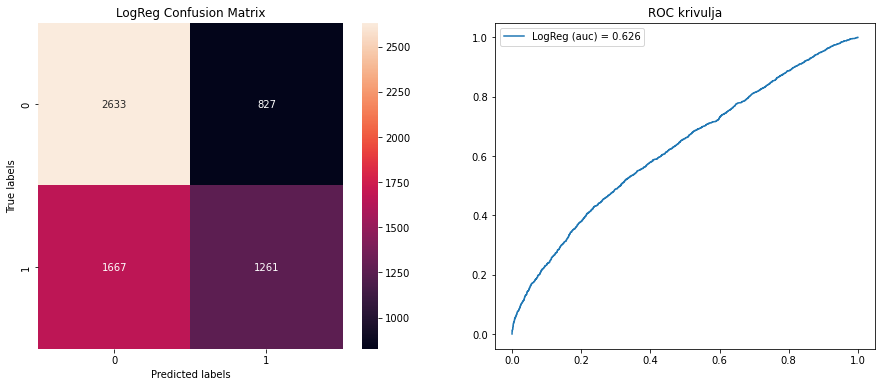

In [25]:
parameters_for_testing = {
    "C": [0.0001, 0.001, 0.01, 0.1],
    "tol": [0.0001, 0.001, 0.01],
    "solver": ["lbfgs", "sag"],
}

lr_opt = LogisticRegression()

gsearch_opt = GridSearchCV(
    estimator = lr_opt,
    param_grid = parameters_for_testing,
    scoring = "accuracy",
    verbose = 1,
)

gsearch_opt.fit(X_train, y_train)

lr_prediction = gsearch_opt.predict(X_test)
lr_cm = confusion_matrix(y_test, lr_prediction)

lr_fpr, lr_tpr, lr_thr = roc_curve(y_test, gsearch_opt.predict_proba(X_test)[::,1])
lr_auc = auc(lr_fpr, lr_tpr)

plt.figure(figsize = (15, 6))

ax = plt.subplot(1, 2, 1)
sns.heatmap(lr_cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('LogReg Confusion Matrix')

plt.subplot(1,2,2, title = "ROC krivulja")
plt.plot(lr_fpr, lr_tpr, linestyle = "-", label = "LogReg (auc) = %0.3f" % lr_auc)
plt.legend()

print("Classification report:\n", classification_report(y_test, lr_prediction))
print("Matthews correlation coefficient:\n", matthews_corrcoef(y_test, lr_prediction))
print(gsearch_opt.best_params_)

plt.show()

[LibSVM]Classification report:
               precision    recall  f1-score   support

           0       0.60      0.84      0.70      3460
           1       0.65      0.35      0.45      2928

    accuracy                           0.61      6388
   macro avg       0.62      0.59      0.58      6388
weighted avg       0.62      0.61      0.59      6388

Matthews correlation coefficient:
 0.21478137756167573


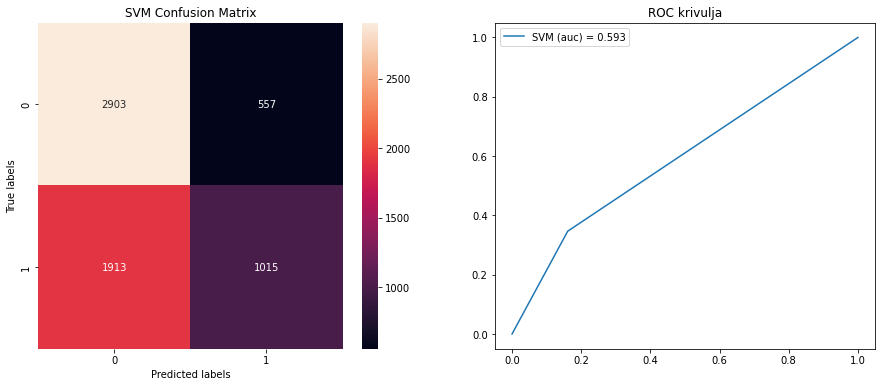

In [15]:
svc_model = SVC(verbose = True)

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(X_test)
svc_cm = confusion_matrix(y_test, svc_predict)

svm_fpr, svm_tpr, svm_thr = roc_curve(y_test, svc_predict)
svm_auc = auc(svm_fpr, svm_tpr)

plt.figure(figsize = (15, 6))

ax= plt.subplot(1, 2, 1)
sns.heatmap(svc_cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('SVM Confusion Matrix')

plt.subplot(1,2,2, title = "ROC krivulja")
plt.plot(svm_fpr, svm_tpr, linestyle = "-", label = "SVM (auc) = %0.3f" % svm_auc)
plt.legend()

print("Classification report:\n", classification_report(y_test, svc_predict))
print("Matthews correlation coefficient:\n", matthews_corrcoef(y_test, svc_predict))

plt.show()

Classification report:
               precision    recall  f1-score   support

           0       0.62      0.81      0.70      3477
           1       0.64      0.39      0.49      2911

    accuracy                           0.62      6388
   macro avg       0.63      0.60      0.59      6388
weighted avg       0.63      0.62      0.60      6388

Matthews correlation coefficient:
 0.22938428649908207


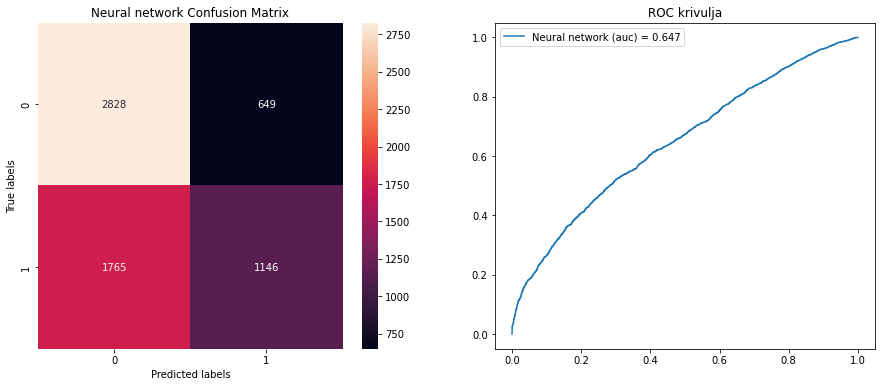

In [ ]:
# napraviti 2 kao u clanku

neural_model = MLPClassifier()

neural_model.fit(X_train, y_train)

neural_predict = neural_model.predict(X_test)
neural_cm = confusion_matrix(y_test, neural_predict)

neural_fpr, neural_tpr, neural_thr = roc_curve(y_test, neural_model.predict_proba(X_test)[::,1])
neural_auc = auc(neural_fpr, neural_tpr)

plt.figure(figsize = (15, 6))

ax= plt.subplot(1, 2, 1)
sns.heatmap(neural_cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Neural network Confusion Matrix')

plt.subplot(1,2,2, title = "ROC krivulja")
plt.plot(neural_fpr, neural_tpr, linestyle = "-", label = "Neural network (auc) = %0.3f" % neural_auc)
plt.legend()

print("Classification report:\n", classification_report(y_test, neural_predict))
print("Matthews correlation coefficient:\n", matthews_corrcoef(y_test, neural_predict))

plt.show()

Classification report:
               precision    recall  f1-score   support

           0       0.57      0.84      0.68      3501
           1       0.55      0.23      0.33      2887

    accuracy                           0.57      6388
   macro avg       0.56      0.54      0.51      6388
weighted avg       0.56      0.57      0.52      6388

Matthews correlation coefficient:
 0.09930960888436315


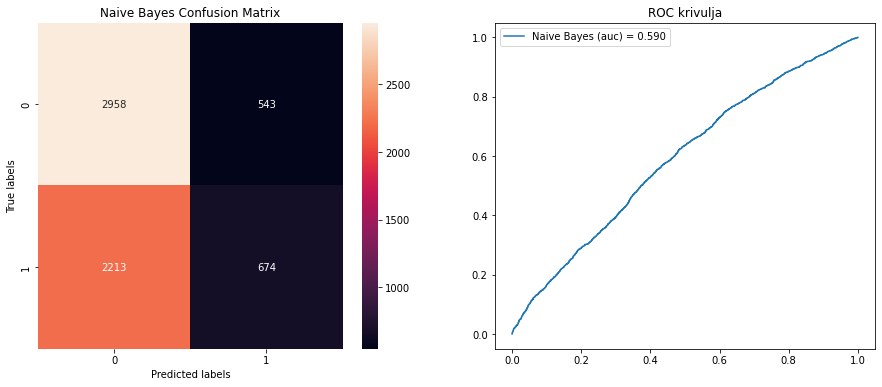

In [7]:
# naive Bayes
X_copy = X.copy()
mm_scaler = MinMaxScaler()
X_naive_scaled = mm_scaler.fit_transform(X_copy)

X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_naive_scaled, y, train_size = 0.95)

bayes_model = MultinomialNB()

bayes_model.fit(X_n_train, y_n_train)

bayes_predict = bayes_model.predict(X_n_test)
bayes_cm = confusion_matrix(y_n_test, bayes_predict)

bayes_fpr, bayes_tpr, bayes_thr = roc_curve(y_n_test, bayes_model.predict_proba(X_n_test)[::,1])
bayes_auc = auc(bayes_fpr, bayes_tpr)

plt.figure(figsize = (15, 6))

ax= plt.subplot(1, 2, 1)
sns.heatmap(bayes_cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Naive Bayes Confusion Matrix')

plt.subplot(1,2,2, title = "ROC krivulja")
plt.plot(bayes_fpr, bayes_tpr, linestyle = "-", label = "Naive Bayes (auc) = %0.3f" % bayes_auc)
plt.legend()

print("Classification report:\n", classification_report(y_n_test, bayes_predict))
print("Matthews correlation coefficient:\n", matthews_corrcoef(y_n_test, bayes_predict))

plt.show()

Classification report:
               precision    recall  f1-score   support

           0       0.61      0.77      0.68      3460
           1       0.60      0.41      0.49      2928

    accuracy                           0.61      6388
   macro avg       0.61      0.59      0.58      6388
weighted avg       0.61      0.61      0.59      6388

Matthews correlation coefficient:
 0.19564349989909982


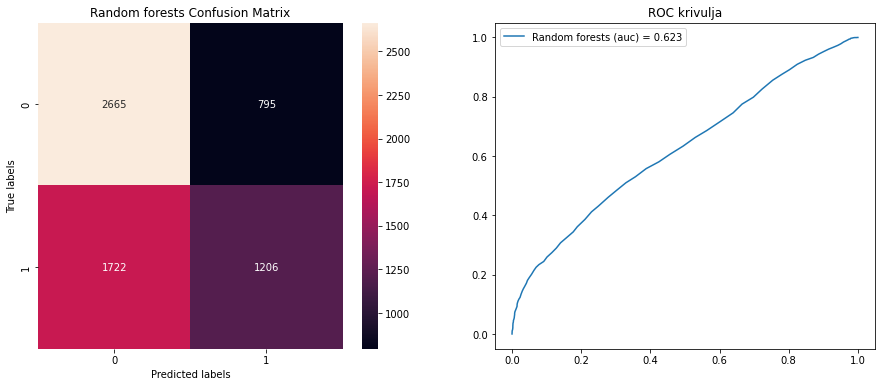

In [26]:
forest_model = RandomForestClassifier()

forest_model.fit(X_train, y_train)

forest_predict = forest_model.predict(X_test)
forest_cm = confusion_matrix(y_test, forest_predict)

forest_fpr, forest_tpr, forest_thr = roc_curve(y_test, forest_model.predict_proba(X_test)[::,1])
forest_auc = auc(forest_fpr, forest_tpr)

plt.figure(figsize = (15, 6))

ax= plt.subplot(1, 2, 1)
sns.heatmap(forest_cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Random forests Confusion Matrix')

plt.subplot(1,2,2, title = "ROC krivulja")
plt.plot(forest_fpr, forest_tpr, linestyle = "-", label = "Random forests (auc) = %0.3f" % forest_auc)
plt.legend()

print("Classification report:\n", classification_report(y_test, forest_predict))
print("Matthews correlation coefficient:\n", matthews_corrcoef(y_test, forest_predict))

plt.show()

Classification report:
               precision    recall  f1-score   support

           0       0.59      0.88      0.71      3460
           1       0.67      0.28      0.40      2928

    accuracy                           0.61      6388
   macro avg       0.63      0.58      0.55      6388
weighted avg       0.63      0.61      0.57      6388

Matthews correlation coefficient:
 0.20490109104425727
{'learning_rate': 0.0001, 'max_depth': 4, 'min_child_weight': 0.0001, 'n_estimators': 1}


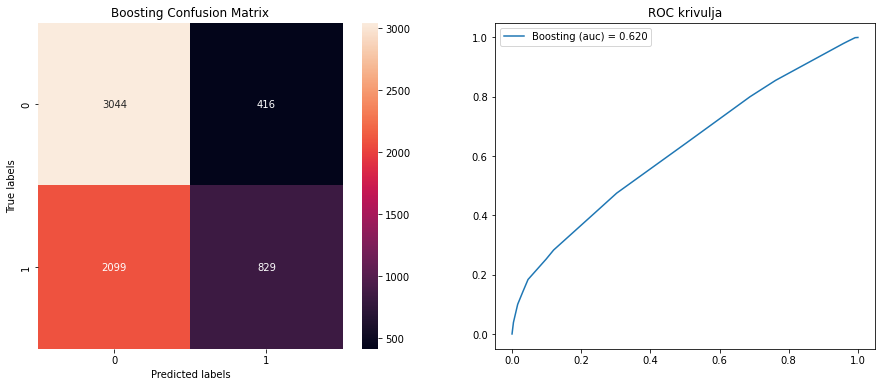

In [17]:
parameters_for_testing = {
    "min_child_weight": [0.0001, 0.001, 0.01, 0.1],
    "learning_rate": [0.0001, 0.001],
    "n_estimators": [1, 3, 5, 10],
    "max_depth": [3, 4],
}

boosting_opt = xgb.XGBClassifier()

# gsearch_opt = GridSearchCV(
#     estimator = boosting_opt,
#     param_grid = parameters_for_testing,
#     scoring = "accuracy",
#     verbose = 1,
# )

#gsearch_opt.fit(X_train, y_train)
boosting_predict = gsearch_opt.predict(X_test)
boosting_cm = confusion_matrix(y_test, boosting_predict)

boosting_fpr, boosting_tpr, boosting_thr = roc_curve(y_test, gsearch_opt.predict_proba(X_test)[::,1])
boosting_auc = auc(boosting_fpr, boosting_tpr)

plt.figure(figsize = (15, 6))

ax= plt.subplot(1, 2, 1)
sns.heatmap(boosting_cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Boosting Confusion Matrix')

plt.subplot(1,2,2, title = "ROC krivulja")
plt.plot(boosting_fpr, boosting_tpr, linestyle = "-", label = "Boosting (auc) = %0.3f" % boosting_auc)
plt.legend()

print("Classification report:\n", classification_report(y_test, boosting_predict))
print("Matthews correlation coefficient:\n", matthews_corrcoef(y_test, boosting_predict))
print(gsearch_opt.best_params_)

plt.show()